In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jcopml.plot import plot_missing_value
import seaborn as sns # visualisasi data
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('Data_prediksicektypedata.csv',sep=';')
data

,minute_timestamp,Pac_pvlib,solarRad,outsideTemp,outsideHumidity,windSpeed,solar_azimuth,Pac,Op_GriSwStt,GridMs_Hz,...,A_Ms_Amp,A_Ms_Vol,A_Ms_Watt,B_Ms_Amp,B_Ms_Vol,Area_PV,number_of_module,efic_pv,beta,Ta
0,01/09/2022 00:00,0.0,0,20.5,91,0.0,-9.340480e-16,0,Grid-tie,48.99,...,0.0,0.0,0.0,0.0,0.0,1.306788,32,0.1544,0.005,25
1,01/09/2022 00:01,0.0,0,20.5,91,0.0,-3.327930e-02,0,Grid-tie,48.99,...,0.0,0.0,0.0,0.0,0.0,1.306788,32,0.1544,0.005,25
2,01/09/2022 00:02,0.0,0,20.5,91,0.0,-6.655790e-02,0,Grid-tie,48.99,...,0.0,0.0,0.0,0.0,0.0,1.306788,32,0.1544,0.005,25
3,01/09/2022 00:03,0.0,0,20.5,91,0.0,-9.983514e-02,0,Grid-tie,48.99,...,0.0,0.0,0.0,0.0,0.0,1.306788,32,0.1544,0.005,25
4,01/09/2022 00:04,0.0,0,20.5,91,0.0,-1.331103e-01,0,Grid-tie,48.99,...,0.0,0.0,0.0,0.0,0.0,1.306788,32,0.1544,0.005,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,31/08/2023 23:55,0.0,0,21.1,91,0.0,-3.126422e-01,0,Grid-tie,48.99,...,0.0,0.0,0.0,0.0,0.0,1.306788,32,0.1544,0.005,25
525596,31/08/2023 23:56,0.0,0,21.1,91,0.0,-2.501212e-01,0,Grid-tie,48.99,...,0.0,0.0,0.0,0.0,0.0,1.306788,32,0.1544,0.005,25
525597,31/08/2023 23:57,0.0,0,21.1,91,0.0,-1.875952e-01,0,Grid-tie,48.99,...,0.0,0.0,0.0,0.0,0.0,1.306788,32,0.1544,0.005,25
525598,31/08/2023 23:58,0.0,0,21.1,91,0.0,-1.250655e-01,0,Grid-tie,48.99,...,0.0,0.0,0.0,0.0,0.0,1.306788,32,0.1544,0.005,25


In [9]:
data.columns

Index(['minute_timestamp', 'Pac_pvlib', 'solarRad', 'outsideTemp',
       'outsideHumidity', 'windSpeed', 'solar_azimuth', 'Pac', 'Op_GriSwStt',
       'GridMs_Hz', 'GridMs_PhV_phsA', 'GridMs_A_phsA', 'A_Ms_Amp', 'A_Ms_Vol',
       'A_Ms_Watt', 'B_Ms_Amp', 'B_Ms_Vol', 'Area_PV', 'number_of_module',
       'efic_pv', 'beta', 'Ta'],
      dtype='object')

In [10]:
# Check for null values
df=data.drop(['A_Ms_Amp', 'A_Ms_Vol',
       'A_Ms_Watt', 'B_Ms_Amp', 'B_Ms_Vol','Area_PV', 'number_of_module',
       'efic_pv', 'beta', 'Ta'],axis=1)
df.isnull().sum()

minute_timestamp    0
Pac_pvlib           0
solarRad            0
outsideTemp         0
outsideHumidity     0
windSpeed           0
solar_azimuth       0
Pac                 0
Op_GriSwStt         0
GridMs_Hz           0
GridMs_PhV_phsA     0
GridMs_A_phsA       0
dtype: int64

In [11]:
df.shape # bentuk/dimensi dataset (baris,kolom)

(525600, 12)

In [12]:
df.dtypes

minute_timestamp     object
Pac_pvlib           float64
solarRad              int64
outsideTemp         float64
outsideHumidity       int64
windSpeed           float64
solar_azimuth       float64
Pac                   int64
Op_GriSwStt          object
GridMs_Hz           float64
GridMs_PhV_phsA     float64
GridMs_A_phsA       float64
dtype: object

In [13]:
df[df.duplicated()]

,minute_timestamp,Pac_pvlib,solarRad,outsideTemp,outsideHumidity,windSpeed,solar_azimuth,Pac,Op_GriSwStt,GridMs_Hz,GridMs_PhV_phsA,GridMs_A_phsA


In [14]:
df[df.duplicated(keep=False)]

,minute_timestamp,Pac_pvlib,solarRad,outsideTemp,outsideHumidity,windSpeed,solar_azimuth,Pac,Op_GriSwStt,GridMs_Hz,GridMs_PhV_phsA,GridMs_A_phsA


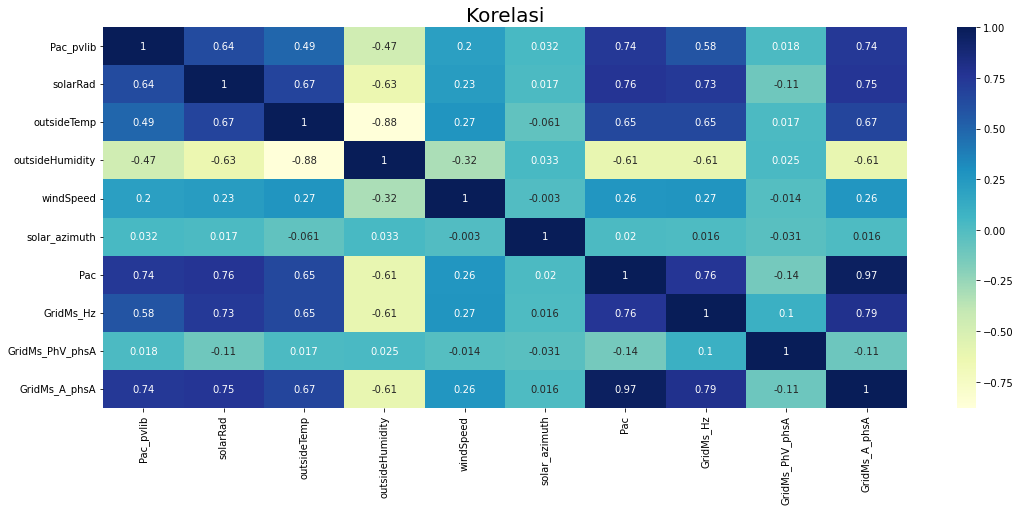

<Figure size 432x288 with 0 Axes>

In [23]:
# Bivariate Analysis
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, annot = True, cmap = "YlGnBu")
plt.title("Korelasi", size = 20)
plt.show()
plt.savefig('korelasifirut.jpg')

In [21]:
# Hitung korelasi antara setiap kolom dalam df dan kolom 'Pac'
correlation_matrix = df.corrwith(df['Pac'])

# Ambil nilai absolut korelasi dan urutkan secara menurun
correlation_matrix_sorted = correlation_matrix.abs().sort_values(ascending=False)

# Cetak hasilnya
print("Sorted Correlation Matrix:", correlation_matrix_sorted)
# Menyimpan plot ke file gambar

Sorted Correlation Matrix: Pac                1.000000
GridMs_A_phsA      0.965777
solarRad           0.764701
GridMs_Hz          0.756586
Pac_pvlib          0.741081
outsideTemp        0.652273
outsideHumidity    0.612525
windSpeed          0.261919
GridMs_PhV_phsA    0.136285
solar_azimuth      0.019844
dtype: float64


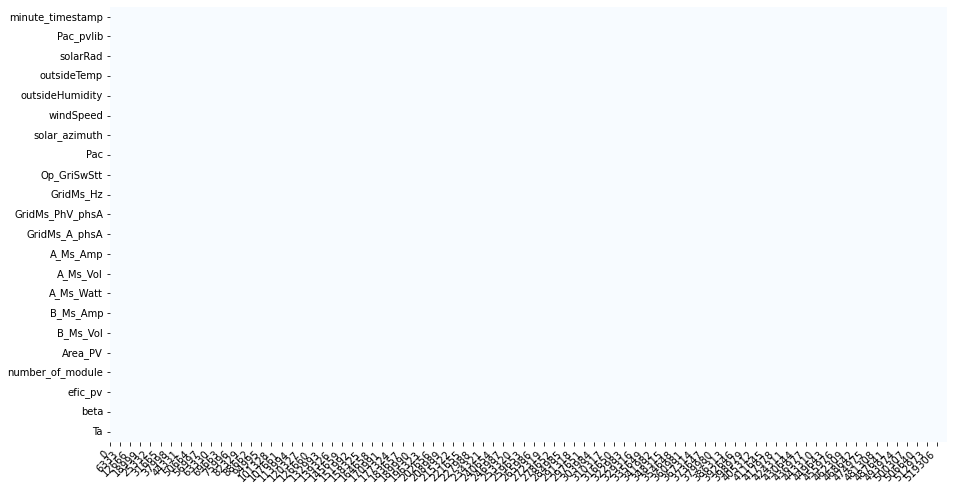

In [51]:
plot_missing_value (df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


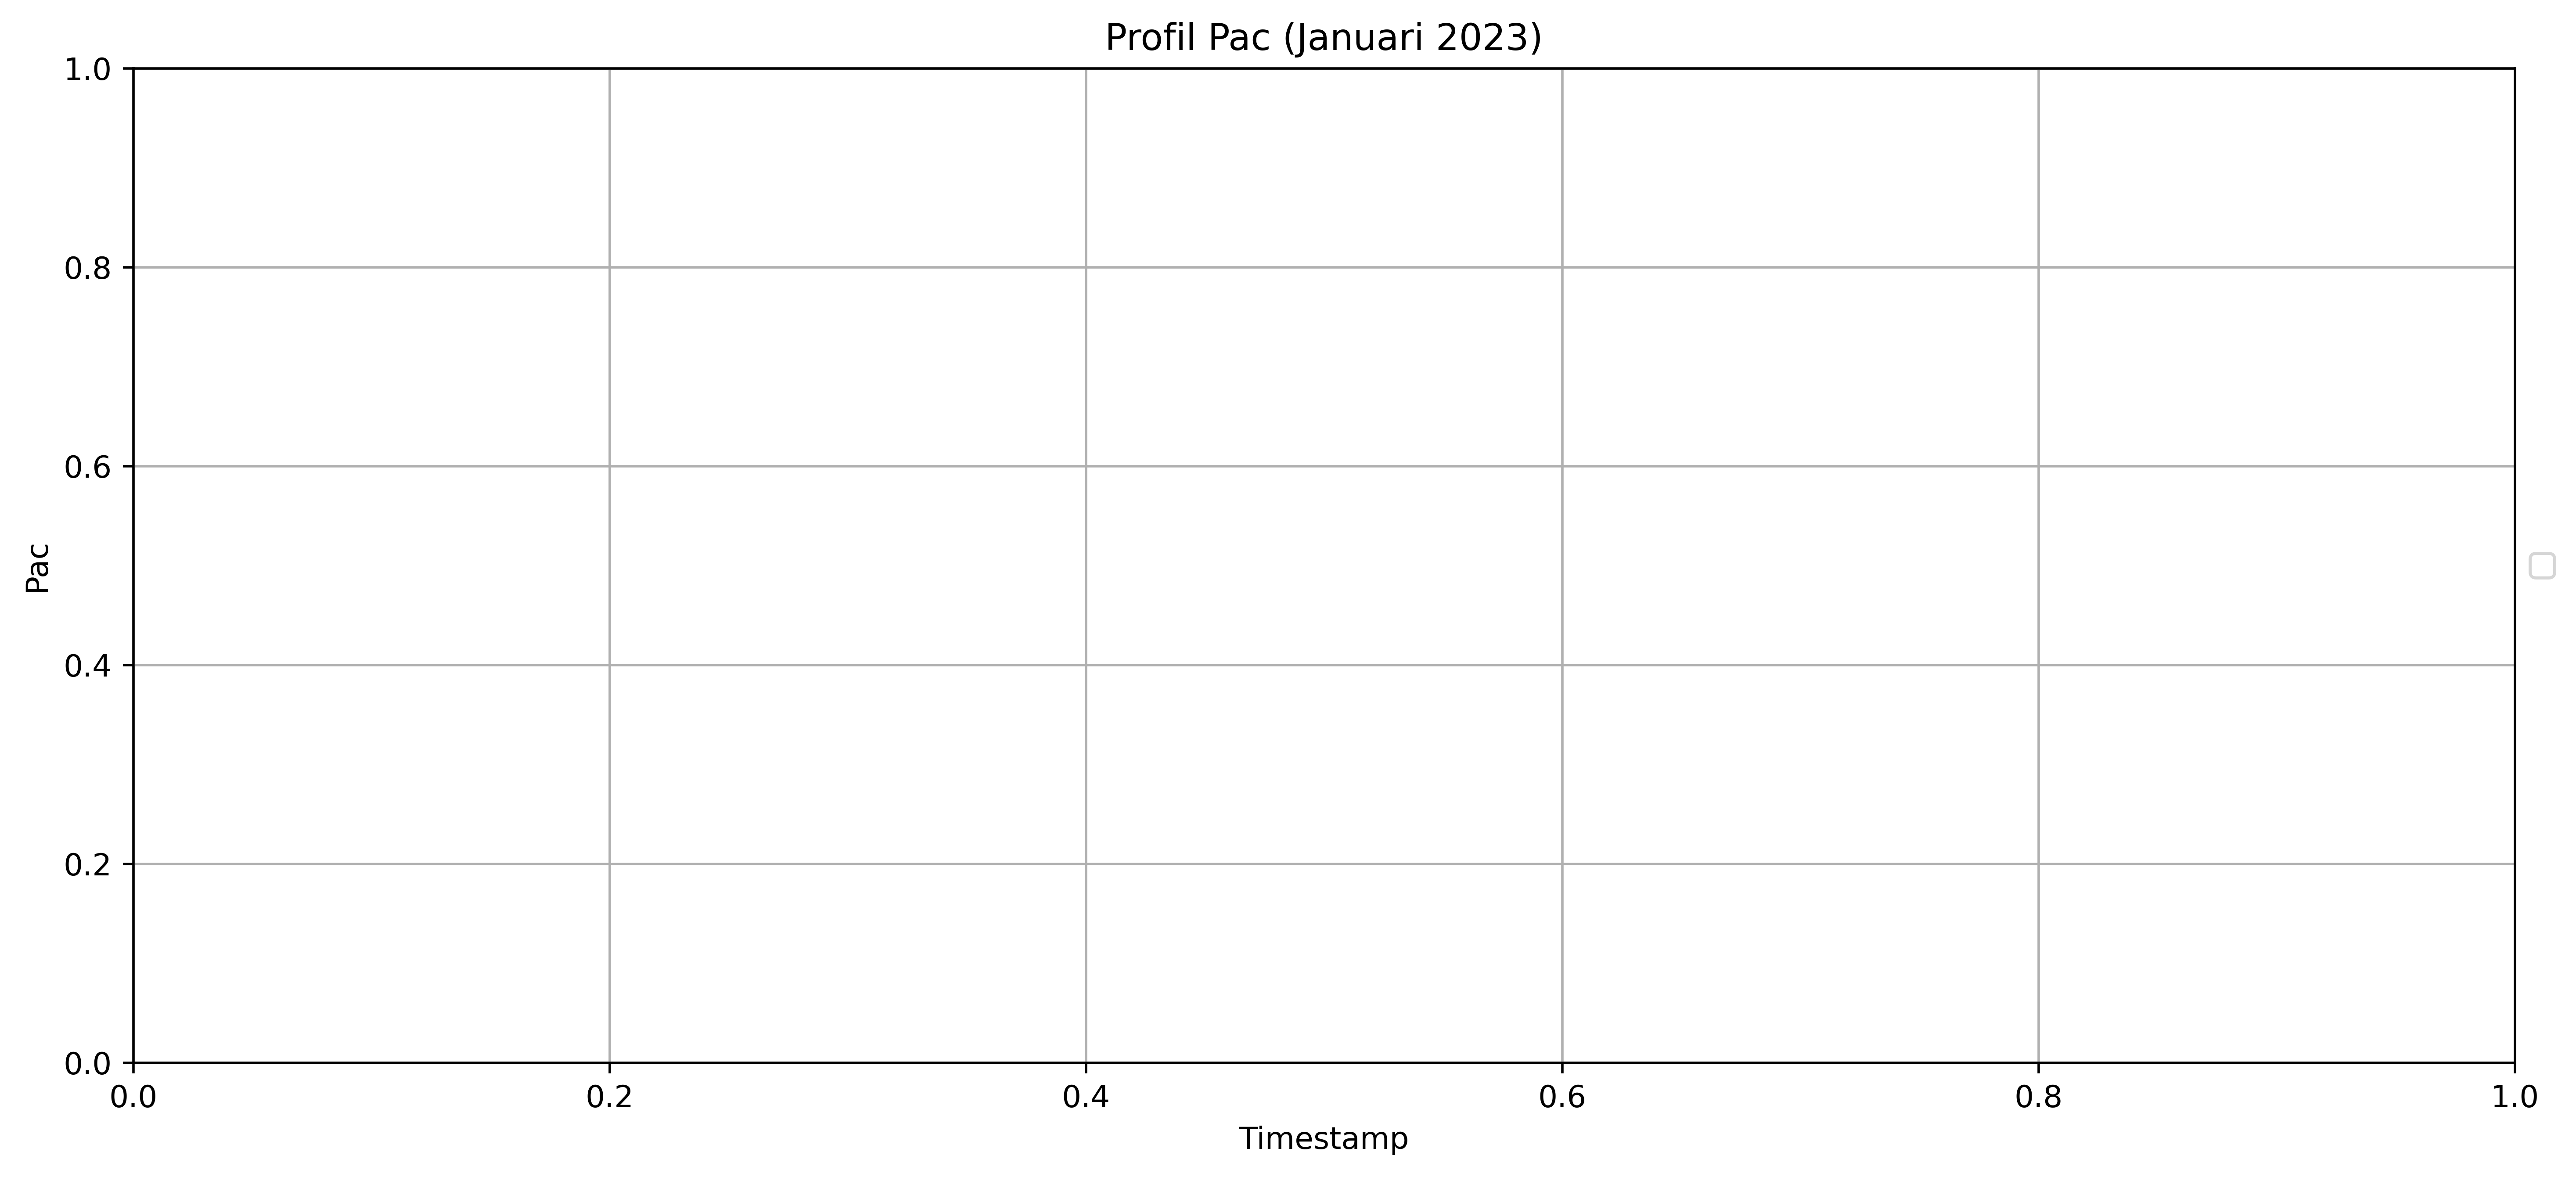

In [52]:
# Konversi kolom 'minute_timestamp' menjadi tipe data datetime
#df['minute_timestamp'] = pd.to_datetime(df['minute_timestamp'])

# Pilih data hanya untuk satu bulan (misalnya, Januari 2023)
start_date = '2022-10-20'
end_date = '2022-10-22'
filtered_data = df[(df['minute_timestamp'] >= start_date) & (df['minute_timestamp'] <= end_date)]

# Assuming 'A_Ms_Vol' is the column representing Tegangan
fig, ax = plt.subplots(figsize=(14, 6), dpi=500)

# Assuming 'Op_GriSwStt' is the column representing modules
for module_state in filtered_data['Op_GriSwStt'].unique():
    module_data = filtered_data[filtered_data['Op_GriSwStt'] == module_state]
    ax.scatter(module_data['minute_timestamp'], module_data['Pac'], label="{}".format(module_state), s=10)

# Adding labels and title to the plot
ax.set_xlabel("Timestamp")
ax.set_ylabel("Pac")
ax.set_title("Profil Pac (Januari 2023)")
ax.grid()

# Displaying legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()


In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi kolom 'minute_timestamp' menjadi tipe data datetime
data['minute_timestamp'] = pd.to_datetime(data['minute_timestamp'])

# Pilih data hanya untuk satu bulan (misalnya, Januari 2023)
start_date = '2022-09-17'
end_date = '2022-09-18'
filtered_data = data[(data['minute_timestamp'] >= start_date) & (data['minute_timestamp'] <= end_date)]

# Assuming 'A_Ms_Vol' is the column representing Tegangan
fig, ax1 = plt.subplots(figsize=(14, 6), dpi=500)

# Plotting Pac data
#for module_state in filtered_data['Op_GriSwStt'].unique():
    #module_data = filtered_data[filtered_data['Op_GriSwStt'] == module_state]
    ax1.plot(module_data['minute_timestamp'], module_data['Pac'], label="{} Pac".format(module_state))

# Adding labels and title to the plot
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Pac", color='tab:blue')
ax1.set_title("Profil Pac dan Solar Radiasi (Januari 2023)")
ax1.grid()

# Displaying legend for Pac
ax1.legend(loc='upper left')

# Creating a second y-axis for solar radiation data
ax2 = ax1.twinx()

# Assuming 'solar_radiation' is the column representing solar radiation
ax2.plot(filtered_data['minute_timestamp'], filtered_data['solarRad'], color='tab:red', label='Solar Radiasi')
ax2.set_ylabel("Solar Radiasi", color='tab:red')

# Displaying legend for Solar Radiasi
ax2.legend(loc='upper right')

# Display the plot
plt.show()


IndentationError: unexpected indent (1434410266.py, line 18)

In [ ]:
df = df.set_index('minute_timestamp')
df.index = pd.to_datetime(df.index)

In [8]:
# Hitung jumlah baris dengan nilai Pac tidak nol untuk setiap status operasional
open_nonzero_pac_count = df[(df['Op_GriSwStt'] == 'Open') & (df['Pac'] != 0)].shape[0]
closed_nonzero_pac_count = df[(df['Op_GriSwStt'] == 'Closed') & (df['Pac'] != 0)].shape[0]

print("Jumlah baris dengan Pac tidak nol saat status operasional Open:", open_nonzero_pac_count)
print("Jumlah baris dengan Pac tidak nol saat status operasional Closed:", closed_nonzero_pac_count)


Jumlah baris dengan Pac tidak nol saat status operasional Open: 0
Jumlah baris dengan Pac tidak nol saat status operasional Closed: 0
